In [2]:
from __future__ import division
from ADMCode import visualize as vis
from ADMCode import ddm, sdt

import numpy as np
import pandas as pd
import numba as nb

from ipywidgets import interactive
from IPython.display import display, Latex
import matplotlib.pyplot as plt
%matplotlib inline
# from safaribook import safariplot as splot
# splot.style('safari-day')
sns.set(style='white', font_scale=1.3)

# Signal Detection Theory

In [3]:
interactive_plot = interactive(vis.sdt_interact, Hits=(1,100,1), Misses=(1,100,1), CR=(1,100,1), FA=(1,100,1))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=100, description='Hits', min=1), IntSlider(value=100, description='Misses', min=1), IntSlider(value=100, description='CR', min=1), IntSlider(value=1, description='FA', min=1), Output(layout=Layout(height='300px'))), _dom_classes=('widget-interact',))

#  Questions: 
#### (double click on the cells below to edit)

#### **Question 1:**  

**1a)** Describe the relationship between number of **Misses** and the criterion parameter ($c$) in SDT (use the interactive visualization at the top to help get some intuition). 

* **Answer 1a:** 



**1b)** Describe the relationship between number of **Misses** and $d'$. 

* **Answer 1b:** 



**1c)** Describe in plain words why $c=\frac{1}{2}d'$ when the **Hit** and **Miss** counts are equal. 

* **Answer 1c:** 



#### **Question 2** 
---

In lab, we modeled **signal** and **noise** trials in a "yes"/"no" experiment in which true "signals" caused evidence to accumulate with positive drift ($v_s>0$) and noise cause evidence to accumulate with negative drift ($v_n<0$). In that experiment, the "subject" was required to provide a response on every trial - "yes" if they detected a signal and "no" if they only detected noise. 

There are many real world examples of a similar, but slightly different behavioral task - in which an action (i.e., reporting "yes") is ONLY required if a signal is detected and to simply withhold responding otherwise. 

Think about the radar example: a person monitoring a radar screen for enemy ships has the single goal to launch a missile if and only if they detect an enemy ship ("signal"). and to withhold their response otherwise.  


---
**2a** Describe how you would modify the parameters of the DDM to formally model this simple detection experiment. You can remove or add any parameters but must provide a reasonable justification for your proposed modifications. Remember, adding too many parameters will make your model intractable and you should try to seek an elegant solution (e.g., avoid unnecessary complexity)

* **Answer 2a:** 




**2b)** What behavioral measures would be of interest when fitting your modified DDM to experimental data collected on this task? How would you have to modify the cost function of the DDM to fit your model to this dataset? (e.g., minimizing the $\chi^2$ between experimental and simulated RT quantiles)

 
* **Answer 2b:** 


#### **Bonus Problem**  

**a)** Modify the `sim_ddm()` function (under the "Drift Diffusion Model" header below) to implement the model you proposed in your answer to **Question 2a**.

* **Bonus Answer a:** *copy/paste your modified code into a code cell below* 

**b)** Run a set of simulations with your modified `sim_ddm()` function with no errors.

* **Bonus Answer b:** *you get credit if I can run your modified code*

# Drift-Diffusion Model

In [34]:
from numpy.random import random_sample

def sim_ddm(parameters, deadline=2.0):
    """
    ::Arguments::
        parameters: 1d array (Nparams) of DDM parameters
            a: boundary height
            tr: non-decision time
            v: drift-rate
            z: starting point (frac of a; 0.0 < z < 1.0)
            si: diffusion constant (sigma param in DDM equation from lecture)
            dx: step-size of evidence
            dt: time step
        rProb: 1d array (Ntimesteps) of random floats between 0 and 1
        trace: 1d array (Ntimesteps) for storing the evidence trace
    
    ::Returns::
        RT (float): the time that evidence crossed one of the boundaries
        choice: 1 if evidence terminated at upper bound, 0 if lower bound
    """
    
    # extract parameters
    a, tr, v, z, si, dx, dt = parameters
    
    # convert drift-rate into a probability, 
    # & scale by sigma (si) and timestep (dt)
    # if v > 0, then 0.5 < vProb < 1.0
    # if v < 0, then 0.0 < vProb < 0.5
    vProb = .5 * (1 + (v * np.sqrt(dt))/si)
    # define starting point with respect to boundary height
    zStart = z * a
    #initialize evidence variable at zStart
    evidence = zStart
    max_steps = int(deadline / dt)
    trace = np.zeros(max_steps)
    trace[0] = evidence
    
    # define deadline (max time allowed for accumulation)
    #deadline = trace.size

    for nsteps in range(1, max_steps):
        # sample a random probability (r) and compare w/ vProb
        if random_sample() < vProb:
            # if r < vProb, step evidence up (towards a)
            evidence += dx
        else:
            # if r > vProb, step evidence down (towards 0)
            evidence -= dx
        # store new value of evidence at current timestep
        trace[nsteps] = evidence

        # check if new value of evidence crossed bound
        if evidence >= a:
            # calculate RT (in milliseconds)
            rt = tr + (nsteps * dt)
            # set choice to 1.0 (upper bound)
            choice = 1.0
            # terminate simulation
            break

        elif evidence <= 0:
            # calculate RT (in milliseconds)
            rt = tr + (nsteps * dt)
            # set choice to 0.0 (lower bound)
            choice = 0.0
            # terminate simulation
            break
            
    plt.plot(trace[:nsteps+1])
    return rt, choice

# Define Parameters

In [4]:
a = .15 # boundary height
v = .24 # strong drift-rate
tr = .25 # nondecision time (in seconds)
z = .5 # starting point ([0,1], fraction of a)

dt = .001 # time step
si = .1 # sigma (noise scalar)
dx = si * np.sqrt(dt) # evidence step
deadline = 1.75 # max decision time
ntime = np.int(np.floor(deadline / dt)) # time limit for decision
ntrials = 1000 # number of trials to simulate

parameters = np.array([a, tr, v, z, si, dx, dt])

# Test Simulations

RT = 796 ms
Choice = 1.0


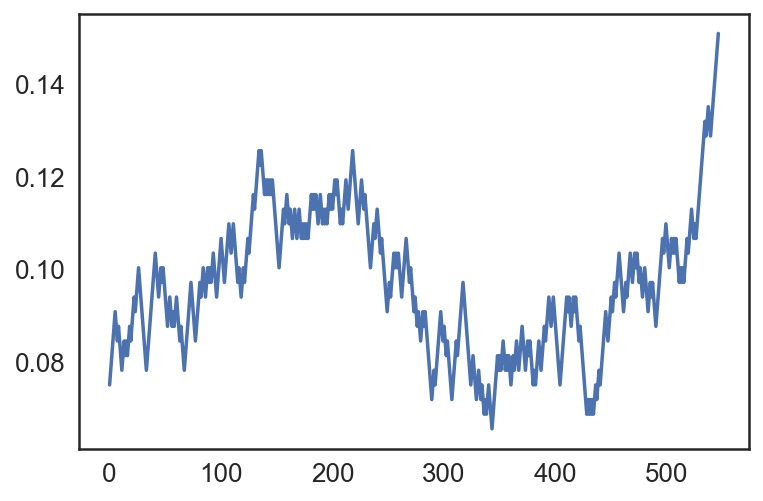

In [35]:
rt, choice = sim_ddm(parameters)
print("RT = {:.0f} ms".format(rt/dt))
print("Choice = {}".format(choice))